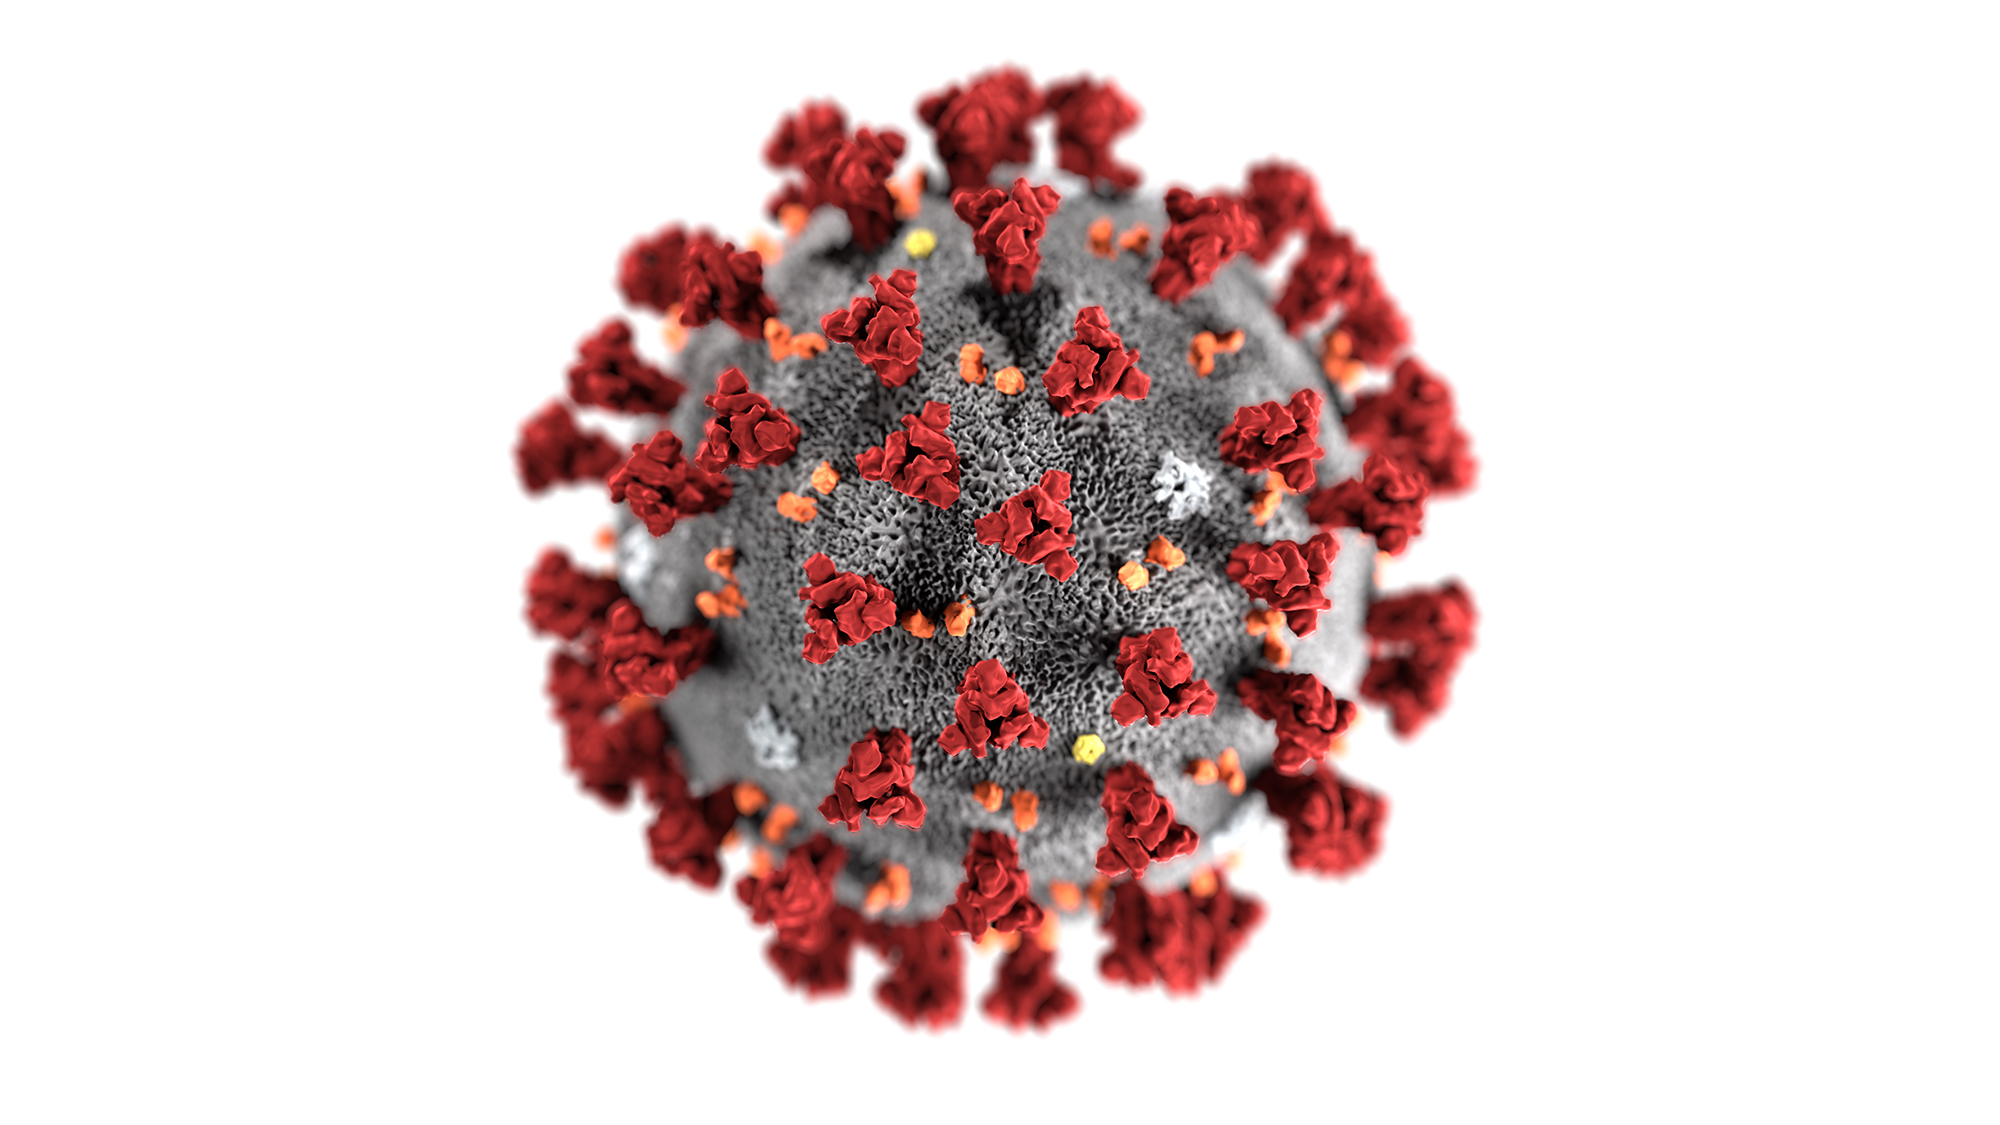

In [1]:
from IPython.display import Image
import os
Image("https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC.jpg")

In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

Importing Data

In [16]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
total_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
total_recovery = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
new_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-27-2020.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-27-2020.csv')

In [17]:
new_cases.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-15 02:33:02,34.223334,-82.461707,34,0,0,34,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-15 02:33:02,30.295065,-92.414197,159,11,0,148,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-15 02:33:02,37.767072,-75.632346,593,8,0,585,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-15 02:33:02,43.452658,-116.241552,759,22,0,737,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-15 02:33:02,41.330756,-94.471059,4,0,0,4,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,2020-05-15 02:33:02,37.104598,-85.281297,91,14,0,77,"Adair, Kentucky, US"
6,29001.0,Adair,Missouri,US,2020-05-15 02:33:02,40.190586,-92.600782,15,0,0,15,"Adair, Missouri, US"
7,40001.0,Adair,Oklahoma,US,2020-05-15 02:33:02,35.884942,-94.658593,74,3,0,71,"Adair, Oklahoma, US"
8,8001.0,Adams,Colorado,US,2020-05-15 02:33:02,39.874321,-104.336258,2448,91,0,2357,"Adams, Colorado, US"
9,16003.0,Adams,Idaho,US,2020-05-15 02:33:02,44.893336,-116.454525,3,0,0,3,"Adams, Idaho, US"


In [18]:
cols = confirmed_cases.keys()

Getting all the dates since the first outbreak

In [19]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = total_deaths.loc[:, cols[4]:cols[-1]]
recoveries = total_recovery.loc[:, cols[4]:cols[-1]]

In [20]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
brazil_cases = []
india_cases = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = []
brazil_recoveries = []
india_recoveries = []

In [21]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    # case studies 
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    brazil_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_recoveries.append(total_recovery[total_recovery['Country/Region']=='China'][i].sum())
    italy_recoveries.append(total_recovery[total_recovery['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(total_recovery[total_recovery['Country/Region']=='US'][i].sum())
    spain_recoveries.append(total_recovery[total_recovery['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(total_recovery[total_recovery['Country/Region']=='France'][i].sum())
    germany_recoveries.append(total_recovery[total_recovery['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(total_recovery[total_recovery['Country/Region']=='United Kingdom'][i].sum())
    brazil_recoveries.append(total_recovery[total_recovery['Country/Region']=='Brazil'][i].sum())
    russia_recoveries.append(total_recovery[total_recovery['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(total_recovery[total_recovery['Country/Region']=='India'][i].sum())

Calculating daily increase in cases

In [22]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
russia_daily_increase = daily_increase(russia_cases)
brazil_daily_increase = daily_increase(brazil_cases)
india_daily_increase = daily_increase(india_cases)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
russia_daily_recovery = daily_increase(russia_recoveries)
brazil_daily_recovery = daily_increase(brazil_recoveries)
india_daily_recovery = daily_increase(india_recoveries)

In [23]:
days_since_jan_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

Forcast of next 20 days

In [24]:
days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-20]

Converting the integer datetime into datetime format

In [25]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [26]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_jan_22, world_cases, test_size=0.36, shuffle=False)

Using SVM algorith to prediction of confirmed cases

In [27]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/Users/madhavikadam/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Checking with the test data

MAE: 453003.4507846945
MSE: 242026494856.52094


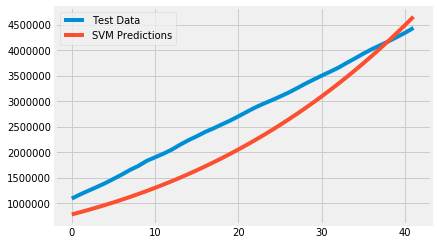

In [34]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

Plotting Covid-19 cases for USA, Brazil , Russia, Spain, UK, China and India since jan 22 2020

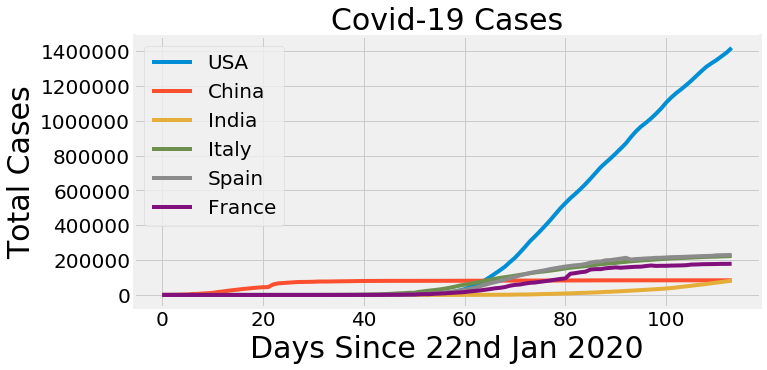

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, us_cases, color = 'red')
plt.plot(adjusted_dates, brazil_cases, color = 'green')
plt.plot(adjusted_dates, russia_cases, color = 'navy')
plt.plot(adjusted_dates, spain_cases, color = 'yellow')
plt.plot(adjusted_dates, uk_cases, color = 'indianred')
plt.plot(adjusted_dates, china_cases, color = 'orange')
plt.plot(adjusted_dates, india_cases, color = 'royalblue')
plt.title('Covid-19 Cases', size=30)
plt.xlabel('Days Since 22nd Jan 2020', size=30)
plt.ylabel('Total Cases', size=30)
plt.legend(['USA','Brazil' , 'Russia', 'Spain', 'UK','China', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Plotting Covid-19 recoveries for USA, Brazil , Russia, Spain, UK, China and India since jan 22 2020

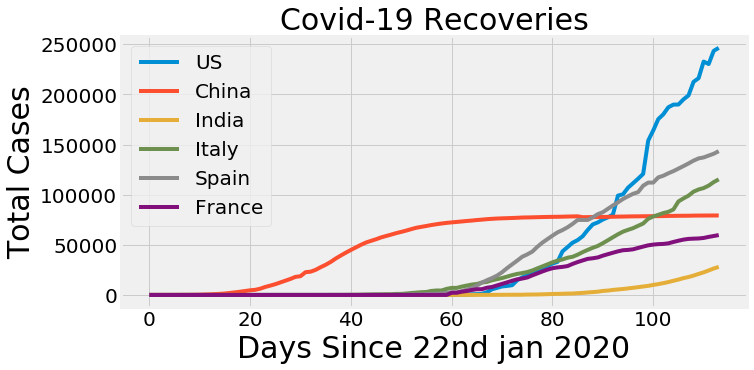

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(adjusted_dates, us_recoveries, color = 'red')
plt.plot(adjusted_dates, brazil_recoveries, color = 'green')
plt.plot(adjusted_dates, russia_recoveries, color = 'navy')
plt.plot(adjusted_dates, spain_recoveries, color = 'yellow')
plt.plot(adjusted_dates, uk_recoveries, color = 'indianred')
plt.plot(adjusted_dates, china_recoveries, color = 'orange')
plt.plot(adjusted_dates, india_recoveries, color = 'royalblue')
plt.title('Covid-19 Recoveries', size=30)
plt.xlabel('Days Since 22nd jan 2020', size=30)
plt.ylabel('Total Cases', size=30)
plt.legend(['USA','Brazil' , 'Russia', 'Spain', 'UK','China', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Plotting Covid-19 cases worldwide since jan 22 2020

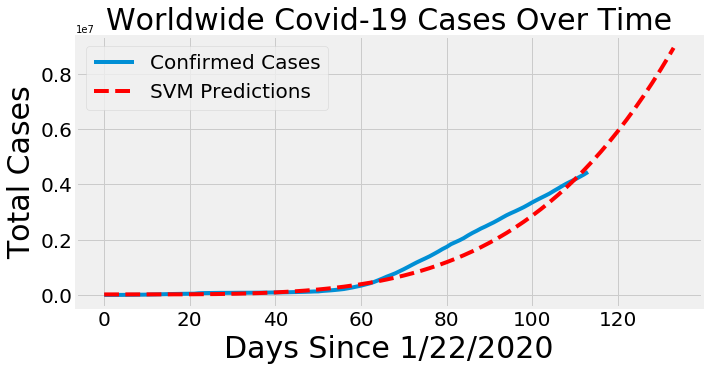

In [40]:
def prediction_graph(x, y, pred, algo_name, color):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Covid-19 Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Total Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

prediction_graph(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'red')

Predicting the future 20 days with SVM

In [32]:
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted Covid-19 Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

,Date,SVM Predicted Covid-19 Confirmed Cases Worldwide
0,05/25/2020,6749781.0
1,05/26/2020,6969534.0
2,05/27/2020,7194625.0
3,05/28/2020,7425140.0
4,05/29/2020,7661164.0
5,05/30/2020,7902786.0
6,05/31/2020,8150092.0
7,06/01/2020,8403172.0
8,06/02/2020,8662115.0
9,06/03/2020,8927010.0
